In [ ]:
#============================ Loading required libraries ============================#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier

file_path = '../medical dataset/heart-data.csv'
hd = pd.read_csv(file_path)
hd = hd.rename(columns={'resting bp s': 'resting bps'})
column_headers = hd.columns.to_list()
print(column_headers)
output_path = "../clean-data.csv"
# hd.to_csv(output_path, index=False)
print(f"Combined dataset saved to {output_path}")
# Check the number of unique values and list the unique values for each column
for column in hd.columns:
    unique_values = hd[column].unique()  # Get unique values
    num_unique_values = hd[column].nunique()  # Count unique values
    print(f"Column: {column}")
    print(f"Number of Unique Values: {num_unique_values}")
    print(f"Unique Values: {unique_values}\n")


: 

In [6]:
file_path = '../clean-data.csv'
df = pd.read_csv(file_path)
# Calculate total missing values per column
for column in df.columns:
    missing_values = df[column].isnull().sum()
    total_values = len(df[column])
    missing_percentage = (df[column].isnull().sum() / len(df[column])) * 100
    print(f"Column: {column}")
    print(f"Total Values {total_values}")
    print(f"Missing Values {missing_values}")
    print(f"Percentage {missing_percentage}\n")

Column: age
Total Values 1190
Missing Values 0
Percentage 0.0

Column: sex
Total Values 1190
Missing Values 0
Percentage 0.0

Column: chest pain type
Total Values 1190
Missing Values 0
Percentage 0.0

Column: resting bps
Total Values 1190
Missing Values 0
Percentage 0.0

Column: cholesterol
Total Values 1190
Missing Values 0
Percentage 0.0

Column: fasting blood sugar
Total Values 1190
Missing Values 0
Percentage 0.0

Column: resting ecg
Total Values 1190
Missing Values 0
Percentage 0.0

Column: max heart rate
Total Values 1190
Missing Values 0
Percentage 0.0

Column: exercise angina
Total Values 1190
Missing Values 0
Percentage 0.0

Column: oldpeak
Total Values 1190
Missing Values 0
Percentage 0.0

Column: ST slope
Total Values 1190
Missing Values 0
Percentage 0.0

Column: target
Total Values 1190
Missing Values 0
Percentage 0.0



In [7]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
#============================ Feature Engineering ============================#
# Normalise or scale Numerical Features
columns_to_normalize = ['age', 'resting bps', 'cholesterol', 'max heart rate']
scaler = MinMaxScaler()
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
output_path = "../cleaned_data.csv"
#df.to_csv(output_path, index=False)
# normalized_file_path = "/mnt/data/normalized_data.csv"
# df.to_csv(normalized_file_path, index=False)

In [8]:
# Remove duplicate rows
df_cleaned = df.drop_duplicates()
output_path = "../cleaned_data.csv"
#df_cleaned.to_csv(output_path, index=False)

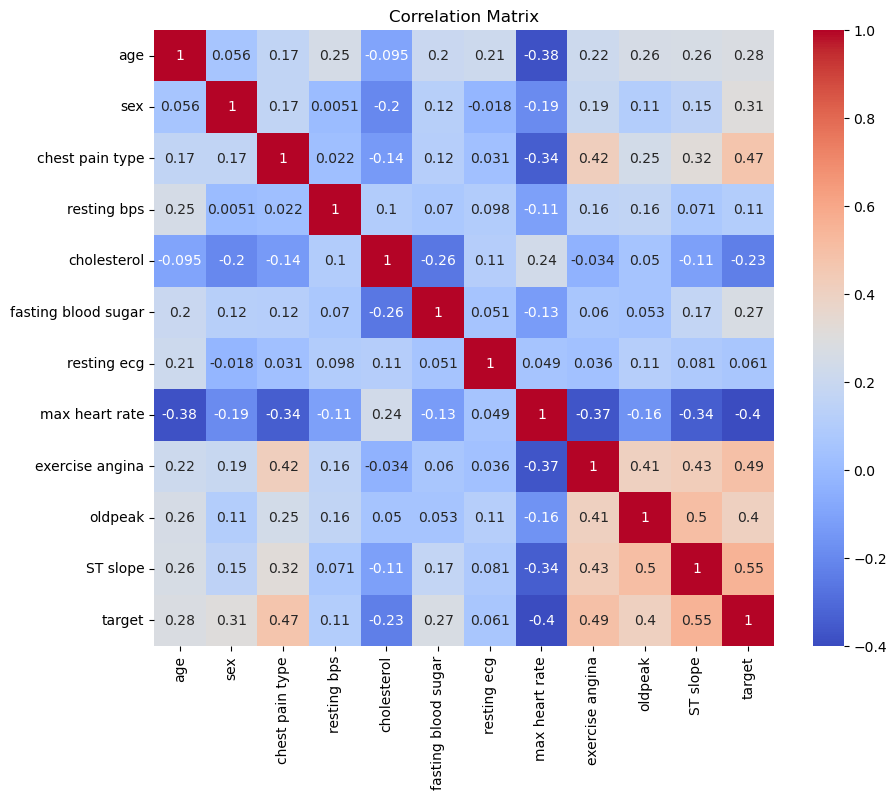

In [9]:
# Generate a correlation matrix
correlation_matrix = df_cleaned.corr()
# List highly correlated pairs
threshold = 0.9
# Identify highly correlated feature pairs
correlated_features = []
for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.columns:
        if col1 != col2 and correlation_matrix.loc[col1, col2] > threshold:
            correlated_features.append((col1, col2))
# Remove duplicate pairs (e.g., (A, B) and (B, A))
correlated_features = list(set([tuple(sorted(pair)) for pair in correlated_features]))
# Optional: Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [10]:
df['chest pain type'] = df['chest pain type'].replace(4, 0)
output_path = "../cleaned_data.csv"
#df.to_csv(output_path, index=False)

In [11]:
# One-hot encode
df_one_hot = pd.get_dummies(df, columns=['chest pain type', 'resting ecg', 'ST slope'], drop_first=True)
output_path = "../featureEng.csv"
# df_one_hot.to_csv(output_path, index=False)

In [12]:
# Divide the dataset into:

# Training set (70%): Used to train the model.
# Validation set (15%): Used for hyperparameter tuning.
# Test set (15%): Final evaluation.
file_path = '../featureEng.csv'
fe = pd.read_csv(file_path)
X = fe.drop('target', axis=1)
Y = fe['target']

X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

In [13]:
# Step 4: Train General ML Models
# You can start with traditional ML models like Logistic Regression, Random Forest, or XGBoost.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train logistic regression
model = LogisticRegression()
model.fit(X_train, Y_train)

# Evaluate on validation set
y_val_pred = model.predict(X_val)
print("Accuracy:", accuracy_score(Y_val, y_val_pred))
print("Classification Report:\n", classification_report(Y_val, y_val_pred))


Accuracy: 0.9157303370786517
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.87      0.91        86
           1       0.89      0.96      0.92        92

    accuracy                           0.92       178
   macro avg       0.92      0.91      0.92       178
weighted avg       0.92      0.92      0.92       178



In [14]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, Y_train)

y_val_pred = xgb_model.predict(X_val)
print("XGBoost Accuracy:", accuracy_score(Y_val, y_val_pred))


XGBoost Accuracy: 0.9606741573033708


In [ ]:
X_train_text = [
    f"A {row['sex']} gender patient aged {row['age']}, with chest pain type {row['chest pain type_1']} and cholesterol {row['cholesterol']}, has a heart disease risk."
    for _, row in X_train.iterrows()
]
from transformers import AutoModelForSequenceClassification, AutoTokenizer, Trainer, TrainingArguments

# Tokenize text
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
train_encodings = tokenizer(X_train_text, truncation=True, padding=True, max_length=512)

# Define the model
model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

# Training
training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=3,
    per_device_train_batch_size=16,
    evaluation_strategy="epoch",
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_encodings,
    eval_dataset=tokenizer(X_val.to_list(), truncation=True, padding=True),
)
trainer.train()


: 

In [17]:
#Polynomial Features: Capture non-linear relationships between variables.
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
poly_features = poly.fit_transform(data[['age', 'cholesterol', 'resting bp']])
poly_feature_names = poly.get_feature_names_out(['age', 'cholesterol', 'resting bp'])
poly_df = pd.DataFrame(poly_features, columns=poly_feature_names)
data = pd.concat([data, poly_df], axis=1)


NameError: name 'data' is not defined

In [18]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(data.drop('target', axis=1), data['target'])
feature_importances = pd.Series(model.feature_importances_, index=data.drop('target', axis=1).columns)
feature_importances.sort_values(ascending=False).plot(kind='bar')


NameError: name 'data' is not defined